In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [119]:
df = pd.read_csv('output.csv')

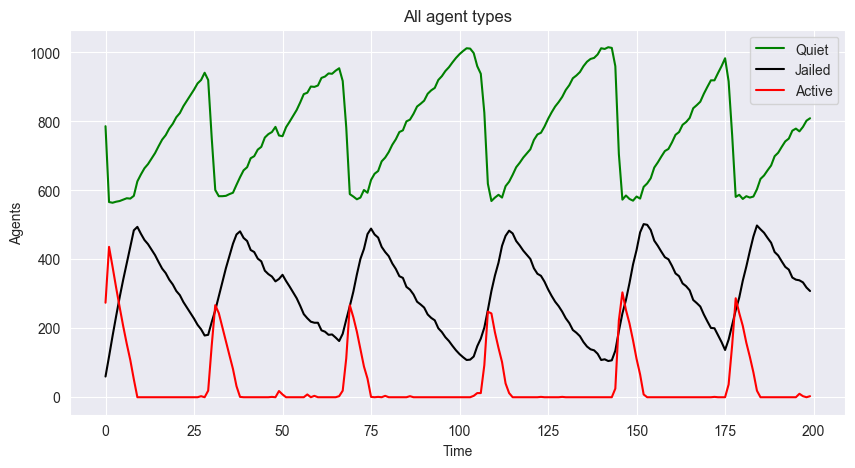

In [120]:
plt.figure(figsize=(10, 5))

plt.plot(df['tick'], df['quiet'], label='Quiet', color='green')
plt.plot(df['tick'], df['jailed'], label='Jailed', color='black')
plt.plot(df['tick'], df['active'], label='Active', color='red')

plt.legend()

plt.title('All agent types')
plt.xlabel('Time')
plt.ylabel('Agents')

plt.grid(True)

plt.savefig('All agent types.png')

plt.show()


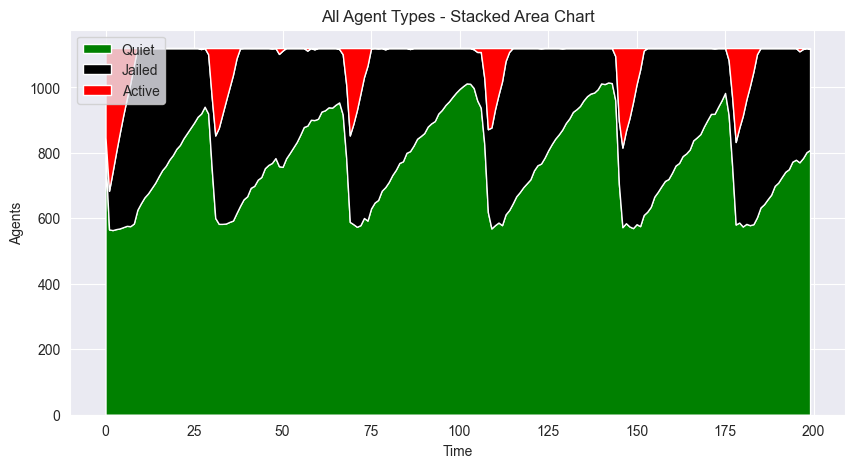

In [121]:
plt.figure(figsize=(10, 5))
plt.stackplot(df['tick'], df['quiet'], df['jailed'], df['active'], labels=['Quiet', 'Jailed', 'Active'], colors=['green', 'black', 'red'])
plt.legend(loc='upper left')
plt.title('All Agent Types - Stacked Area Chart')
plt.xlabel('Time')
plt.ylabel('Agents')
plt.grid(True)
plt.savefig('Stacked_Area_Chart.png')
plt.show()

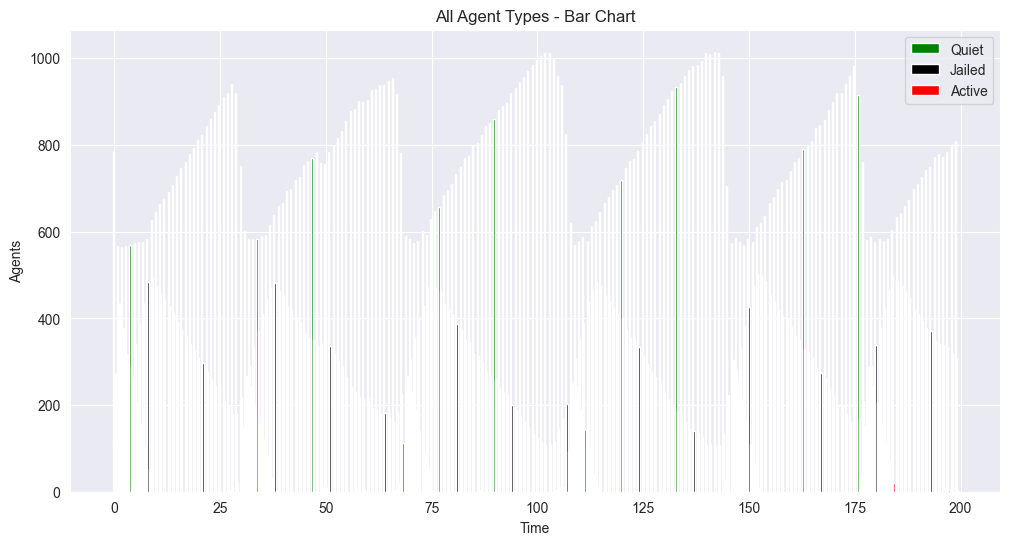

In [122]:
plt.figure(figsize=(12, 6))
width = 0.25
ticks = df['tick']

plt.bar(ticks - width, df['quiet'], width=width, color='green', label='Quiet')
plt.bar(ticks, df['jailed'], width=width, color='black', label='Jailed')
plt.bar(ticks + width, df['active'], width=width, color='red', label='Active')

plt.legend(loc='upper right')
plt.title('All Agent Types - Bar Chart')
plt.xlabel('Time')
plt.ylabel('Agents')
plt.grid(True)
plt.savefig('Bar_Chart.png')
plt.show()


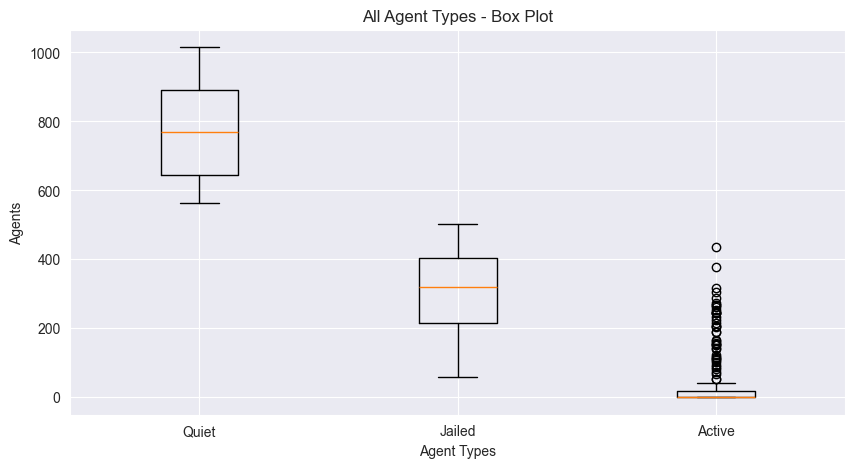

In [123]:
plt.figure(figsize=(10, 5))
plt.boxplot([df['quiet'], df['jailed'], df['active']], labels=['Quiet', 'Jailed', 'Active'])
plt.title('All Agent Types - Box Plot')
plt.xlabel('Agent Types')
plt.ylabel('Agents')
plt.grid(True)
plt.savefig('Box_Plot.png')
plt.show()


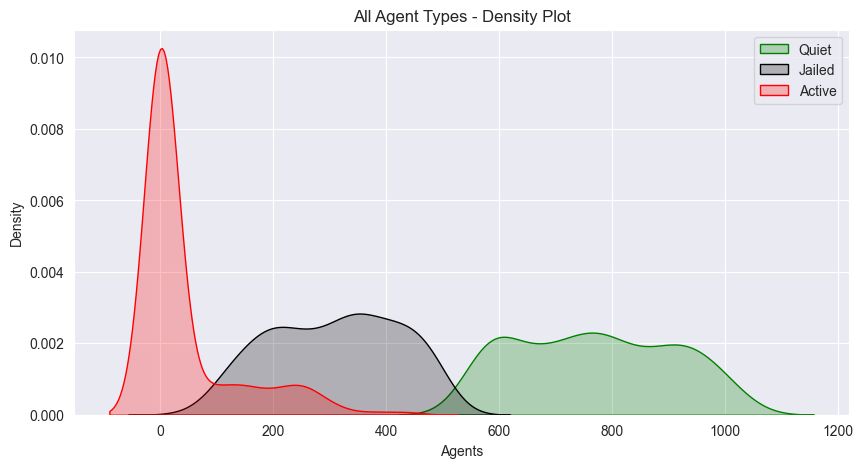

In [124]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['quiet'], fill=True, color='green', label='Quiet')
sns.kdeplot(df['jailed'], fill=True, color='black', label='Jailed')
sns.kdeplot(df['active'], fill=True, color='red', label='Active')

plt.title('All Agent Types - Density Plot')
plt.xlabel('Agents')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('Density_Plot.png')
plt.show()

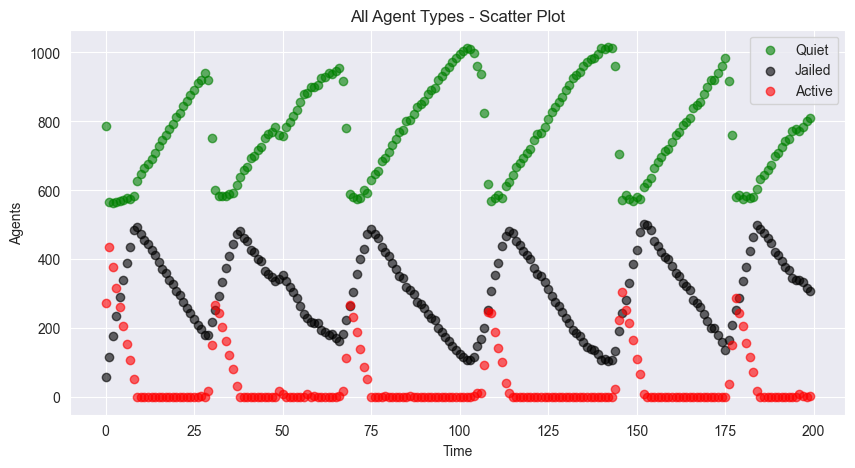

In [125]:
plt.figure(figsize=(10, 5))
plt.scatter(df['tick'], df['quiet'], color='green', label='Quiet', alpha=0.6)
plt.scatter(df['tick'], df['jailed'], color='black', label='Jailed', alpha=0.6)
plt.scatter(df['tick'], df['active'], color='red', label='Active', alpha=0.6)

plt.title('All Agent Types - Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Agents')
plt.legend()
plt.grid(True)
plt.savefig('Scatter_Plot.png')
plt.show()

In [126]:
# 模拟从 NetLogo 输出的 CSV 文件读取数据的过程（您需要根据实际文件路径替换）
data = pd.read_csv("Rebellion All agent types.csv", skiprows=18)

# 分别处理 quiet, jailed, active 数据
quiet_data = data[['x', 'y']].dropna().rename(columns={'y': 'quiet'})
jailed_data = data[['x.1', 'y.1']].dropna().rename(columns={'x.1': 'tick', 'y.1': 'jailed'})
active_data = data[['x.2', 'y.2']].dropna().rename(columns={'x.2': 'tick', 'y.2': 'active'})

# 合并数据
combined = quiet_data.set_index('x').join([jailed_data.set_index('tick'), active_data.set_index('tick')])
combined.reset_index(inplace=True)
combined.columns = ['tick', 'quiet', 'jailed', 'active']

# 输出处理后的数据查看
combined.to_csv("processed_netlogo_data.csv", index=False)

print("数据已保存到 'processed_netlogo_data.csv'")


数据已保存到 'processed_netlogo_data.csv'


In [127]:
# 加载您的模型数据和NetLogo模型数据
your_data = pd.read_csv("output.csv")
netlogo_data = pd.read_csv("processed_netlogo_data.csv")

# 确定两个数据集的最小行数
min_length = min(len(your_data), len(netlogo_data))

# 截取每个数据集的前min_length行
your_data = your_data.head(min_length)
netlogo_data = netlogo_data.head(min_length)



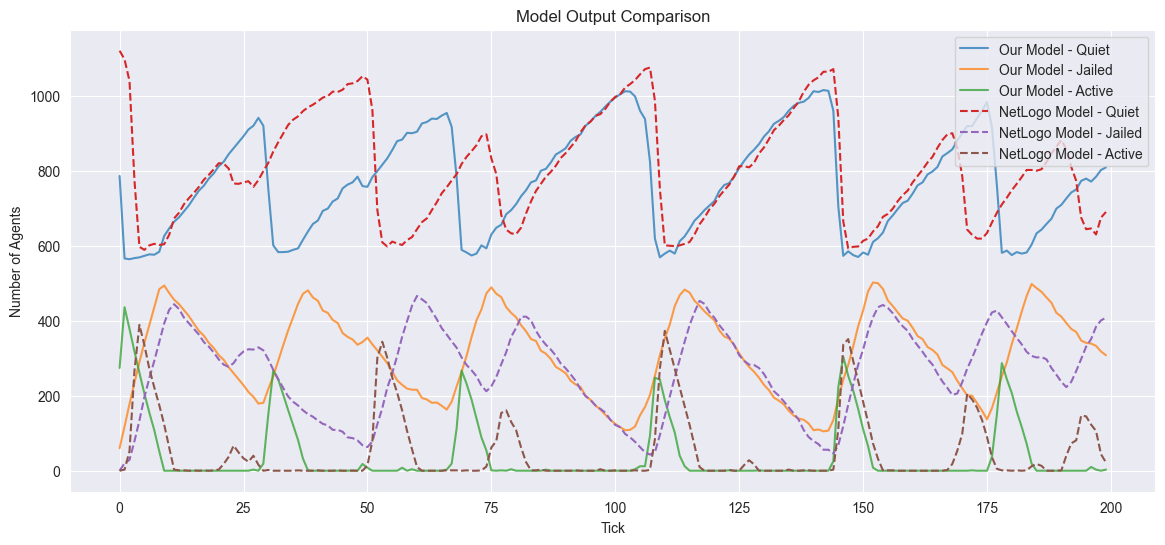

In [128]:
plt.figure(figsize=(14, 6))

# 绘制您的模型数据
plt.plot(your_data['tick'], your_data['quiet'], label='Our Model - Quiet', alpha=0.75)
plt.plot(your_data['tick'], your_data['jailed'], label='Our Model - Jailed', alpha=0.75)
plt.plot(your_data['tick'], your_data['active'], label='Our Model - Active', alpha=0.75)

# 绘制NetLogo模型数据
plt.plot(netlogo_data['tick'], netlogo_data['quiet'], label='NetLogo Model - Quiet', linestyle='--')
plt.plot(netlogo_data['tick'], netlogo_data['jailed'], label='NetLogo Model - Jailed', linestyle='--')
plt.plot(netlogo_data['tick'], netlogo_data['active'], label='NetLogo Model - Active', linestyle='--')

plt.title('Model Output Comparison')
plt.xlabel('Tick')
plt.ylabel('Number of Agents')
plt.legend()
plt.show()

In [129]:
# 比如对比每个状态在两个模型中的差异
stats = {}
for state in ['quiet', 'jailed', 'active']:
    stat, p_value = ttest_ind(your_data[state], netlogo_data[state])
    stats[state] = (stat, p_value)

print("T-Test Results:", stats)


T-Test Results: {'quiet': (-2.357794427199759, 0.01886696698290041), 'jailed': (3.7436780882761256, 0.00020807033611022397), 'active': (-1.115358125358986, 0.2653699831497135)}


In [130]:
# 计算MSE
mse = {}
for state in ['quiet', 'jailed', 'active']:
    mse[state] = mean_squared_error(your_data[state], netlogo_data[state])

print("Mean Squared Errors:", mse)


Mean Squared Errors: {'quiet': 27918.76, 'jailed': 18439.89, 'active': 11001.31}
